<a href="https://colab.research.google.com/github/Hashhhhhhhh/Quantum-Rings-Summer-School/blob/main/Quantum_Oracles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install qiskit

In [30]:
pip install qiskit[visualization]

In [31]:
 pip install qiskit-aer

In [32]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

Make a 3-qubit circuit which applies an X gate to qubit 2 if and only if qubit 0 is 0 and qubit 1 is 1.

In [33]:
qc = QuantumCircuit(3)
qc.x(0)        # Invert control for qubit 0
qc.ccx(0, 1, 2) # Toffoli: triggers when qubit 0 is |1⟩ (originally |0⟩), qubit 1 is |1⟩
qc.x(0)        # Restore qubit 0
qc.draw()

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └───┘  │  └───┘
q_1: ───────■───────
          ┌─┴─┐     
q_2: ─────┤ X ├─────
          └───┘

Make a 3-qubit circuit which applies an X gate to qubit 1 if qubit 2 is in the
 |+> state and then applies a Z gate to qubit 0 if qubit 1 is in the 1 state.

In [34]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

# Put qubit 2 in |+⟩ state
qc.h(q[2])
qc.measure(q[2], c[2])

# Apply X gate to qubit 1 if classical bit 2 is 1
with qc.if_test((c[2], 1)):
    qc.x(q[1])

# Measure qubit 1
qc.measure(q[1], c[1])

# Apply Z gate to qubit 0 if classical bit 1 is 1
with qc.if_test((c[1], 1)):
    qc.z(q[0])

# Measure qubit 0
qc.measure(q[0], c[0])

print(qc.draw())

                                              ┌──────   ┌───┐ ───────┐ ┌─┐
q3_0: ────────────────────────────────────────┤ If-0  ──┤ Z ├  End-0 ├─┤M├
                ┌──────   ┌───┐ ───────┐ ┌─┐  └──╥───   └───┘ ───────┘ └╥┘
q3_1: ──────────┤ If-0  ──┤ X ├  End-0 ├─┤M├─────╫──────────────────────╫─
      ┌───┐┌─┐  └──╥───   └───┘ ───────┘ └╥┘     ║                      ║ 
q3_2: ┤ H ├┤M├─────╫──────────────────────╫──────╫──────────────────────╫─
      └───┘└╥┘┌────╨─────┐                ║ ┌────╨─────┐                ║ 
c3: 3/══════╩═╡ c3_2=0x1 ╞════════════════╩═╡ c3_1=0x1 ╞════════════════╩═
            2 └──────────┘                1 └──────────┘                0 


ORACLES:

Oracles are an important building block for quantum computation. An oracle essentially acts as a black box which performs a computation or transforms a quantum state. For example, an oracle might perform addition or flip the phase of a certain basis state.


ADDITION ORACLE

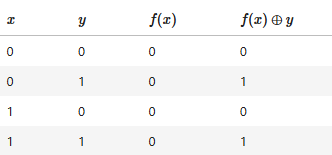

In [35]:
# Define oracle for f(x) = 0
def oracle(qc, qx, qy):
    # Since f(x)=0 always, we do nothing
    pass

# Build circuit
qx = QuantumRegister(1, "x")   # input register
qy = QuantumRegister(1, "y")   # target register
qc = QuantumCircuit(qx, qy)

# Apply oracle
oracle(qc, qx, qy)

# Draw circuit
qc.draw()


x: 
   
y:

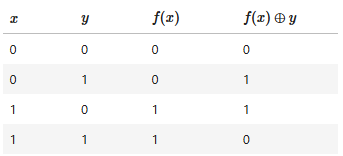

Here if x is 0 (the control qubit) , the output is same as y(target). But when x is 1, the output is a flipped target qubit.

In [36]:
qc=QuantumCircuit(2)
qc.cx(0,1)
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

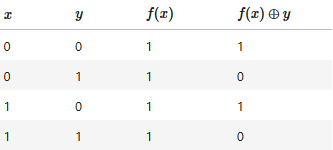

The target qubit is constantly flipped

In [37]:
qc=QuantumCircuit(2)
qc.x(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

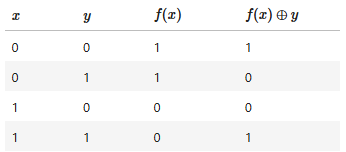

In [43]:
def oracle(qc, qx, qy):
    qc.x(qx[0])        # flip x (so control triggers when original x=0)
    qc.cx(qx[0], qy[0]) # CNOT: if x=1 (originally 0), flip y
    qc.x(qx[0])        # flip x back

qx = QuantumRegister(1, "x")
qy = QuantumRegister(1, "y")

qc = QuantumCircuit(qx, qy)

oracle(qc, qx, qy)
qc.draw()

┌───┐     ┌───┐
x: ┤ X ├──■──┤ X ├
   └───┘┌─┴─┐└───┘
y: ─────┤ X ├─────
        └───┘

PHASE-FLIP ORACLE

A phase flip oracle, as the name suggests, flips the phase of a certain state. This is helpful because flipping the phase is a way of marking a state (for example, the correct answer).

STEPS:

1. Apply hadamard to all the qubits to be in a commplete superposition state
2. Apply x-gate
3. Controlled z gate to all the qubits.

In [47]:
#step-1: defining a target state
#In Qiskit, qubits are ordered reversed compared to classical bitstrings, so reverse it.
target_state = '01'
rev_target = target_state[::-1]   # reverse for Qiskit ordering
num_qubits = len(target_state)
print("Target(qiskit)", rev_target)

Target(qiskit) 10


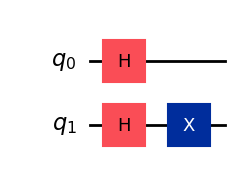

In [48]:
qc = QuantumCircuit(num_qubits)
# Apply Hadamard to all qubits -> uniform superposition
qc.h(range(num_qubits))
# Apply X to all positions where target = '0'
for i, bit in enumerate(rev_target):
    if bit == '0':
        qc.x(i)

qc.draw('mpl')


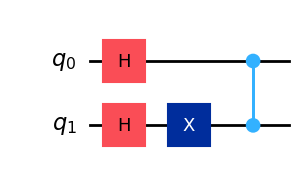

In [49]:
qc.cz(0, 1)   # control qubit 0, target qubit 1
qc.draw('mpl')

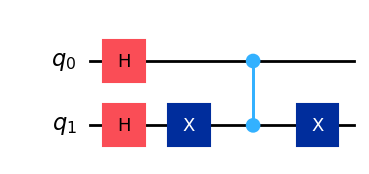

In [50]:
#undoing the x transformation
for i, bit in enumerate(rev_target):
    if bit == '0':
        qc.x(i)

qc.draw('mpl')

<IPython.core.display.Latex object>

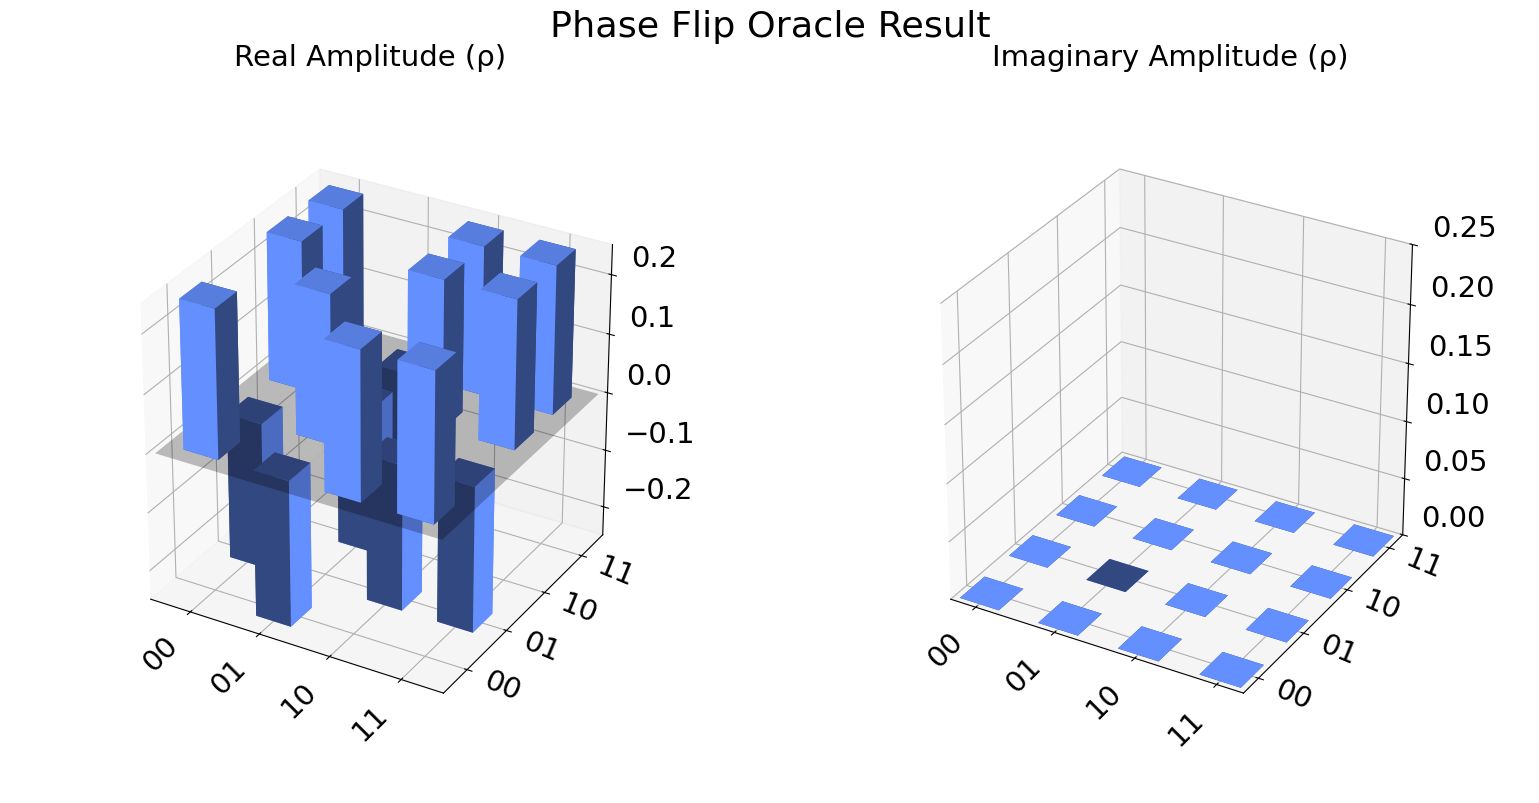

In [52]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city

# Get final statevector
state = Statevector.from_instruction(qc)
display(state.draw('latex'))  # pretty print
plot_state_city(state, title="Phase Flip Oracle Result")

Construct an oracle for the target state 00. You can check your work by putting Hadamards on all qubits, then your oracle, and then printing out the final statevector.

In [56]:
def add_phase_flip_oracle(qc: QuantumCircuit, target: str):
    """
    Marks (adds a -1 phase to) the computational basis state |target>.
    'target' is written left-to-right (e.g. '011' means q2 q1 q0 = 0 1 1).
    """
    n = len(target)
    # Qiskit stores qubits little-endian; reverse to match wire indices
    rev = target[::-1]

    # 1) X on positions that are 0 in the target so that target -> |11..1>
    zeros = [i for i, b in enumerate(rev) if b == '0']
    for i in zeros:
        qc.x(i)

    # 2) Multi-controlled-Z on all qubits
    if n == 1:
        qc.z(0)
    elif n == 2:
        qc.cz(0, 1)
    else:
        # CCZ = H on last qubit, then multi-controlled X, then H back
        last = n - 1
        qc.h(last)
        qc.mcx(list(range(n-1)), last)  # multi-controlled X (no ancilla version)
        qc.h(last)

    # 3) Uncompute the X gates
    for i in zeros:
        qc.x(i)


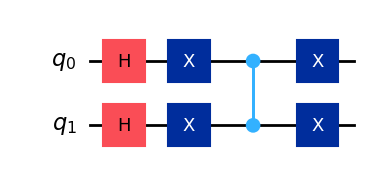

<IPython.core.display.Latex object>

In [55]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)

#prepare equal superposition to "see" the mark
qc.h([0, 1])

# oracle that marks |00>
add_phase_flip_oracle(qc, '00')

display(qc.draw('mpl'))

state = Statevector.from_instruction(qc)
display(state.draw('latex'))


 Following the same approach as above, but for a 3 qubit system, construct an oracle for the target state 011.

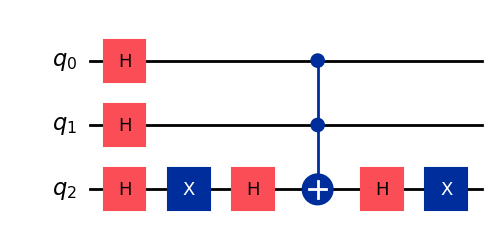

<IPython.core.display.Latex object>

In [59]:
qc = QuantumCircuit(3)

#superposition
qc.h([0, 1, 2])

# oracle that marks |011>
add_phase_flip_oracle(qc, '011')

display(qc.draw('mpl'))

state = Statevector.from_instruction(qc)
display(state.draw('latex'))
